In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from IPython.display import Image
import os
%matplotlib inline  

# Bob Kruse
# CSC 4447 - Final Project

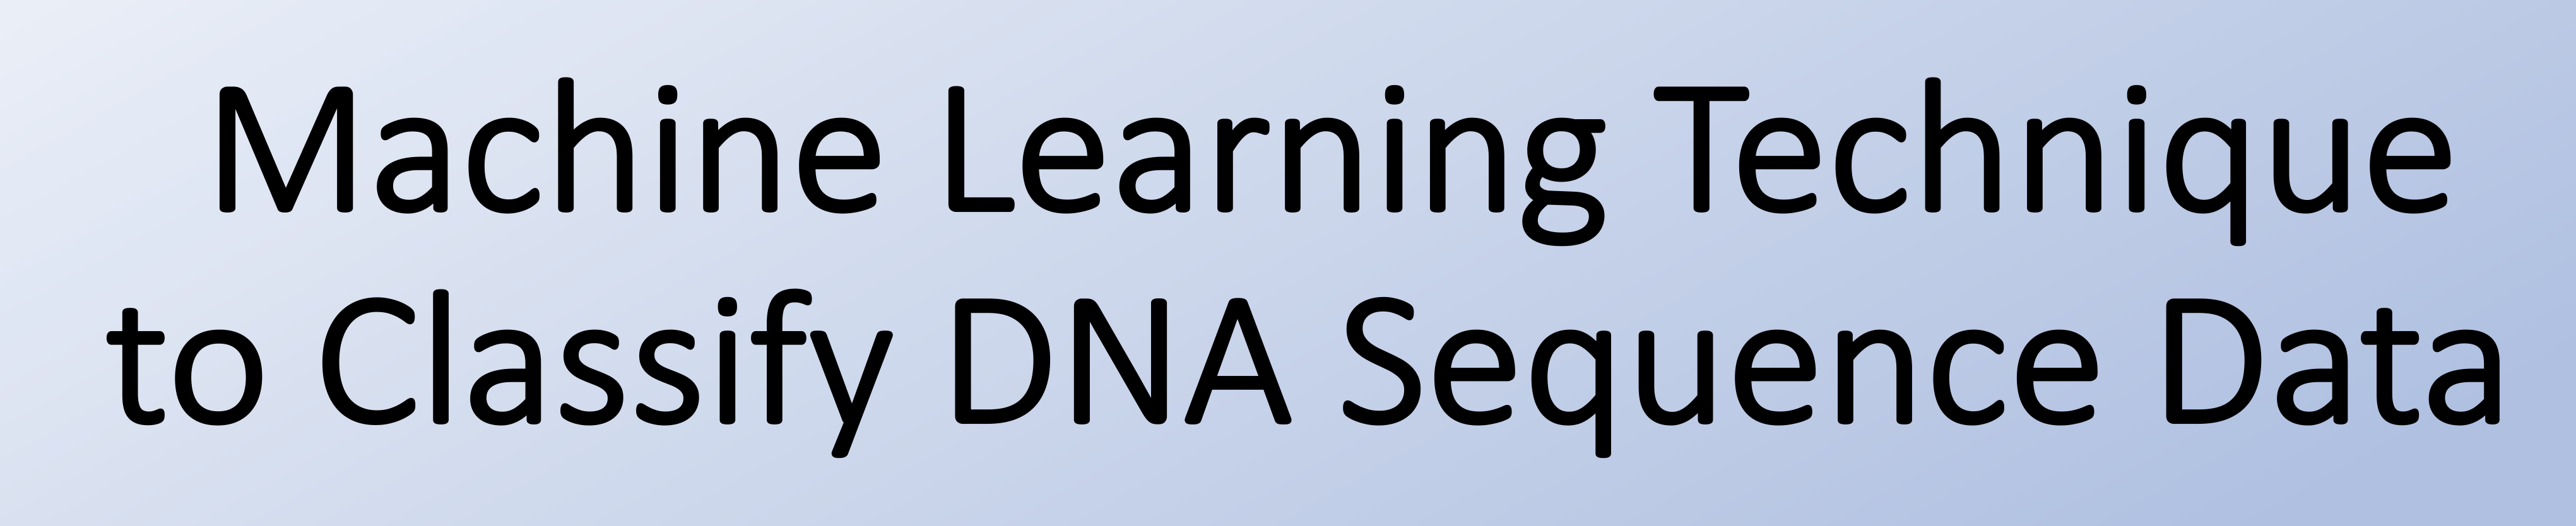

In [2]:
Image ('TitleSlide.png')

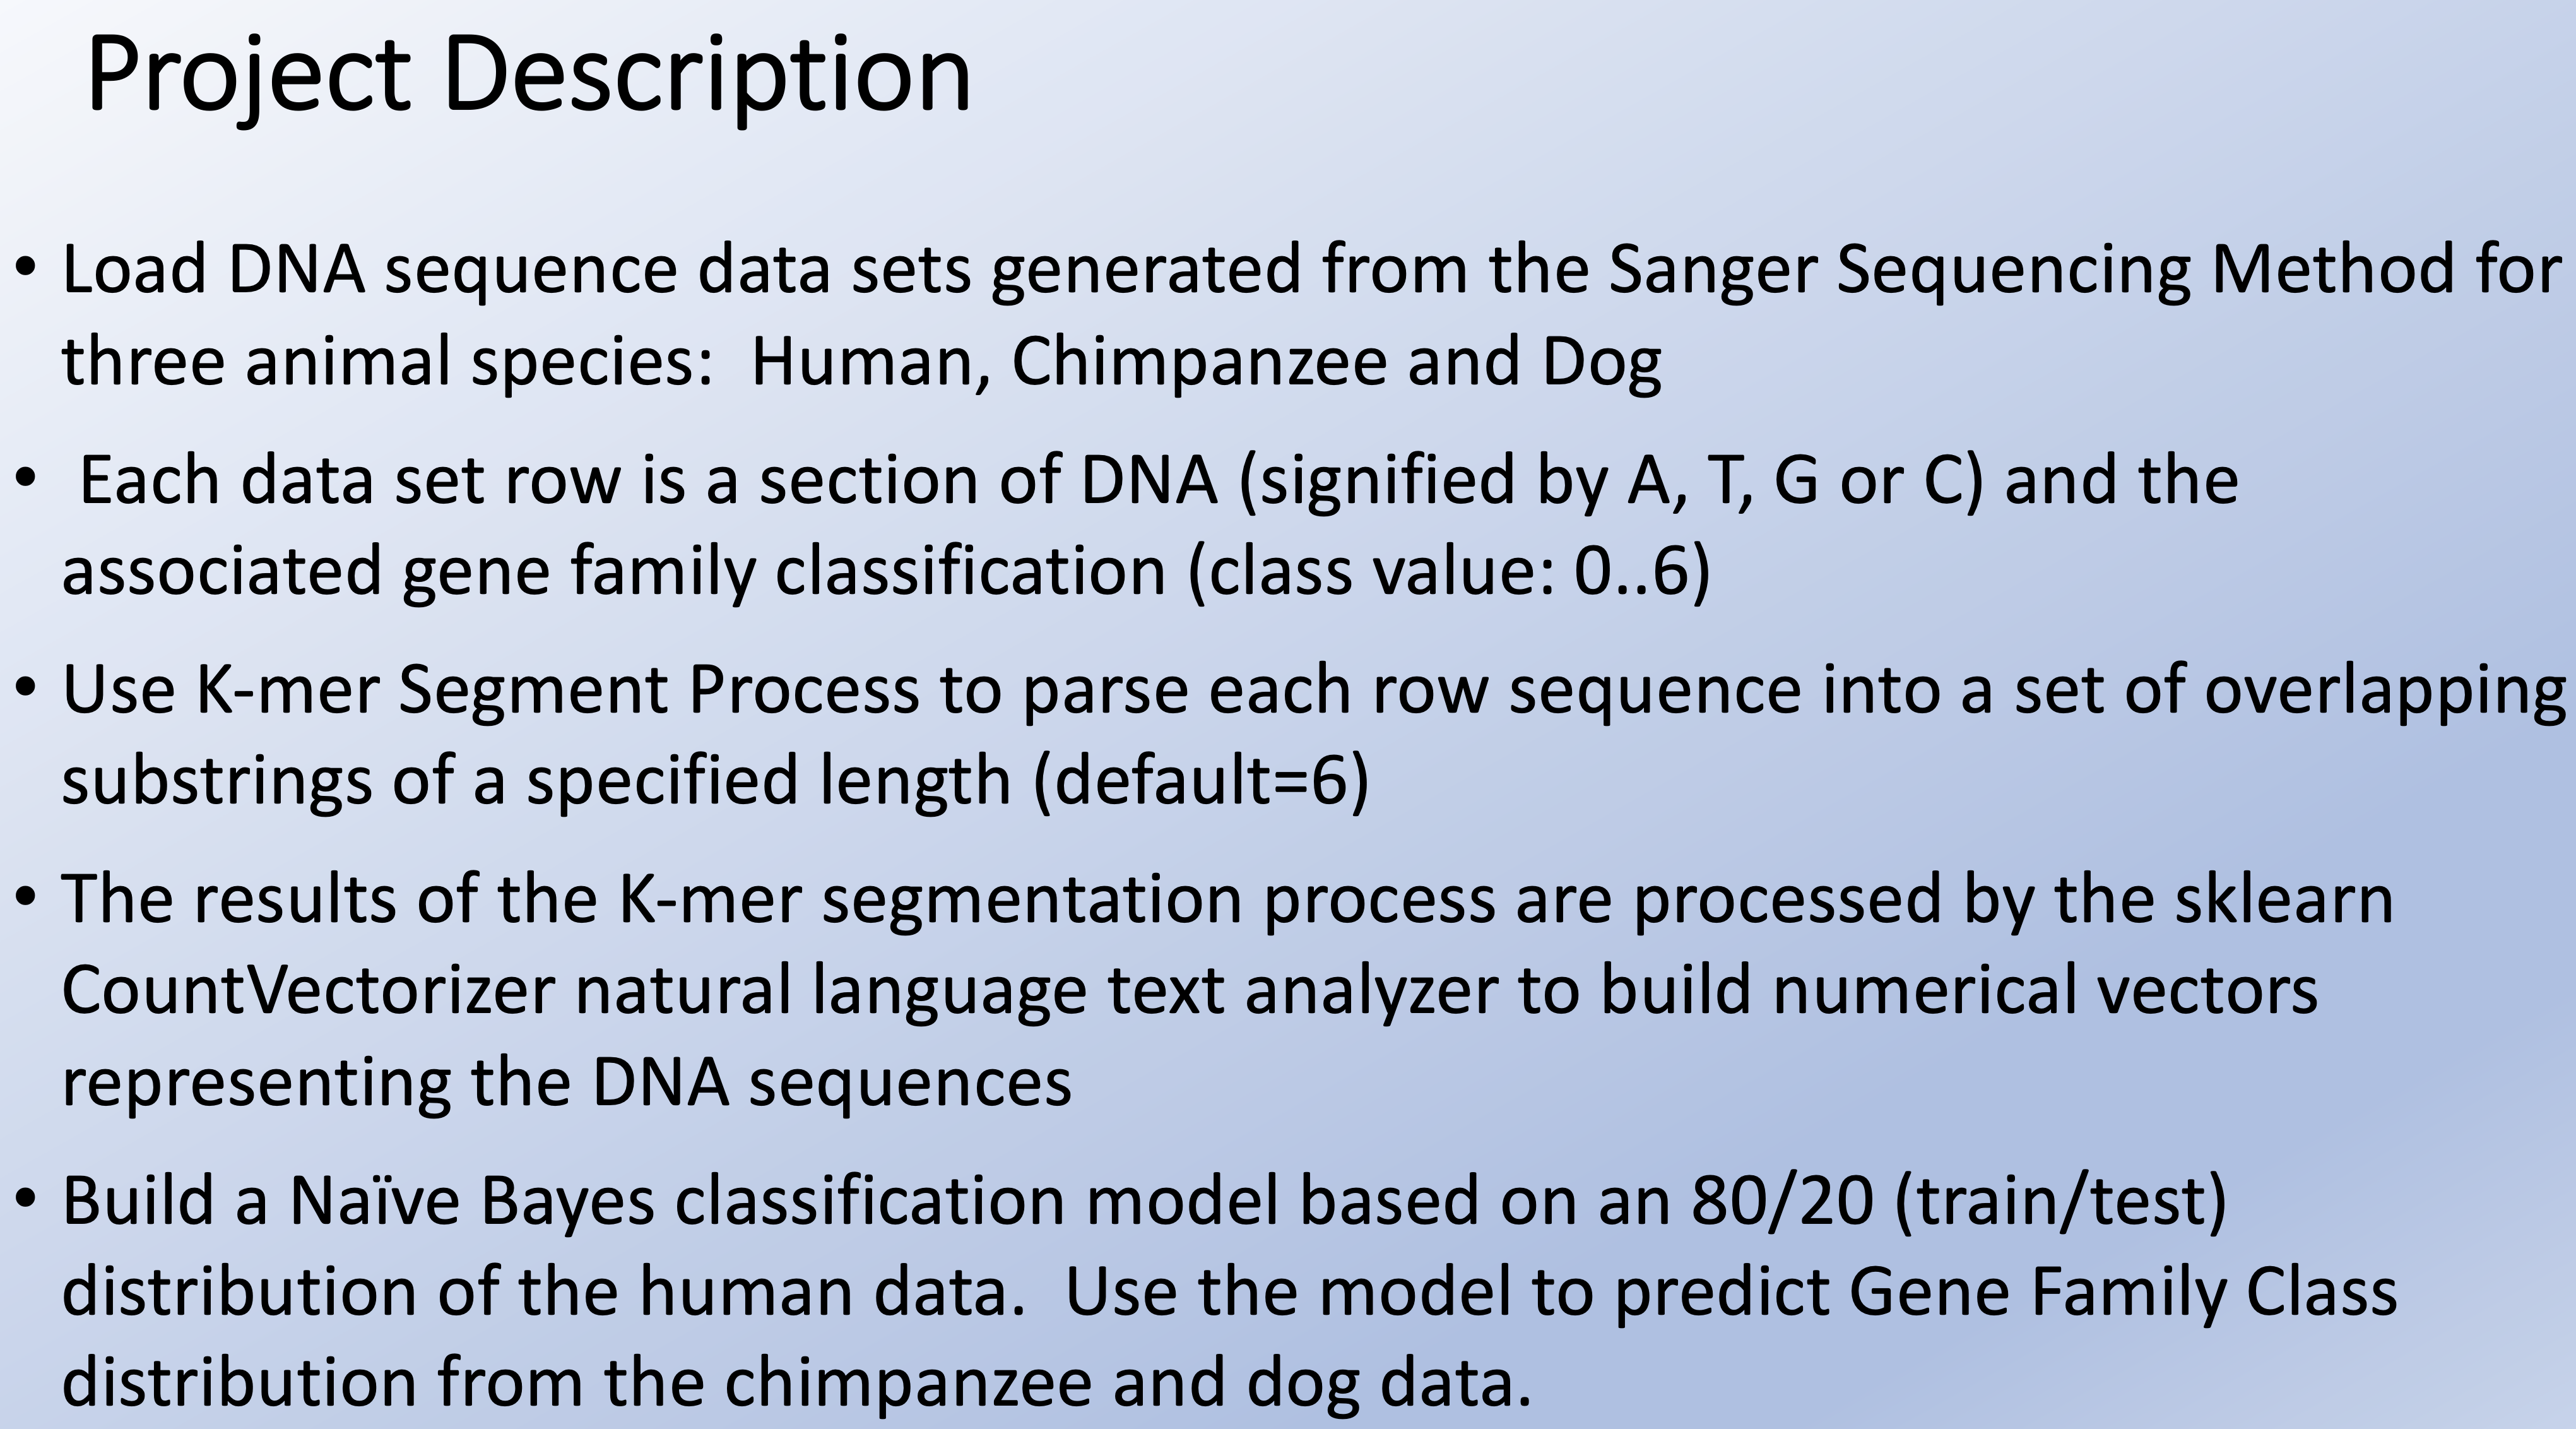

In [3]:
Image ('ProjectDescription.png')

# Real word problem:  Develop test model to predict gene family classification

# DNA Analysis is being done by multiple research agencies and private companies.

# There are some missing sequences in the DNA data sequence.  These are represented by the letter 'N'.  There was no cleansing to reconstruct missing values.

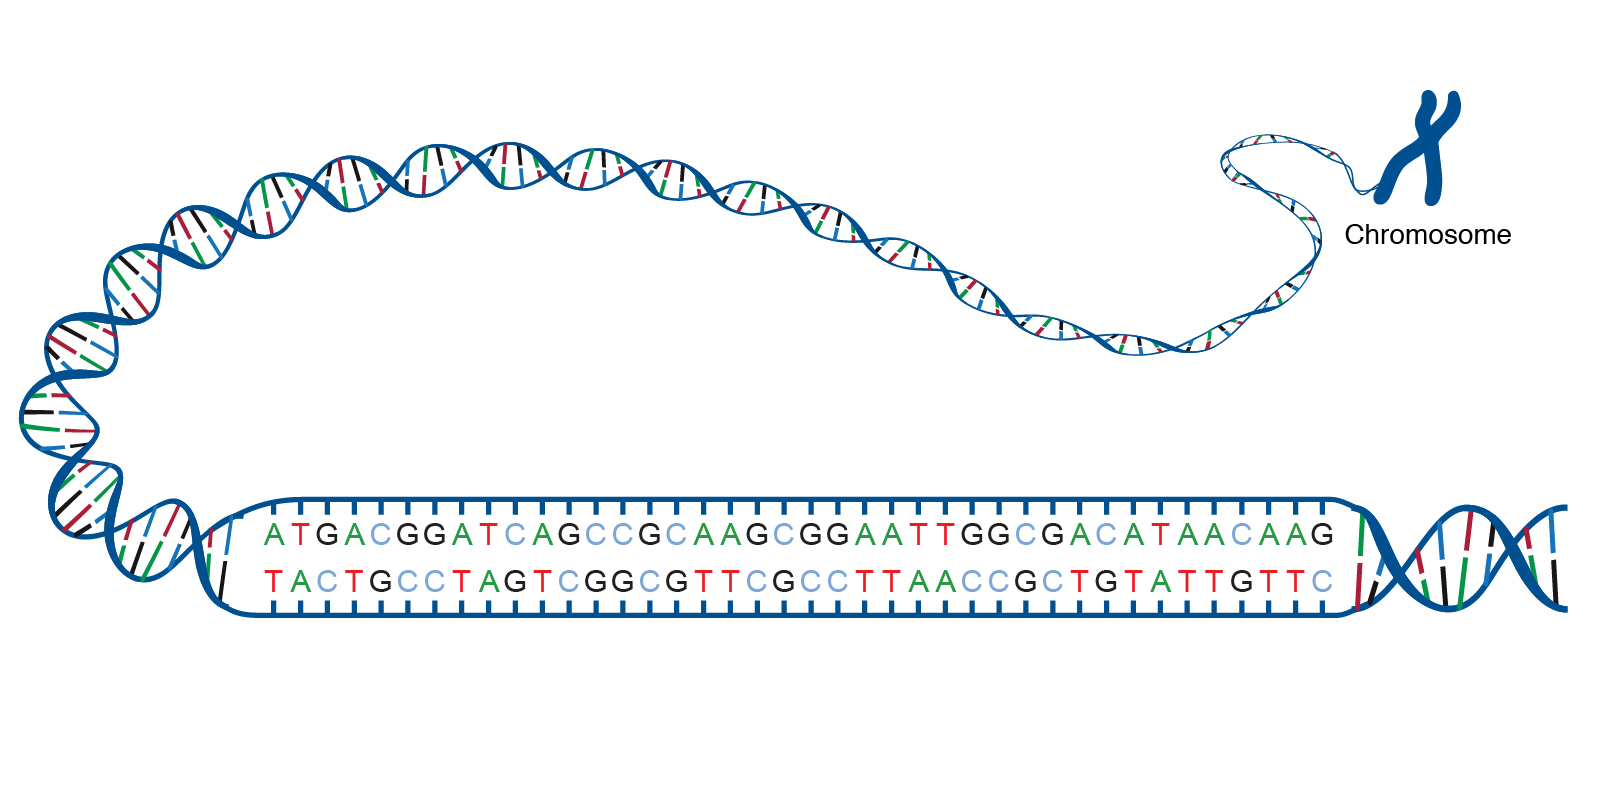

In [4]:
Image ('dnaStrand.jpeg')

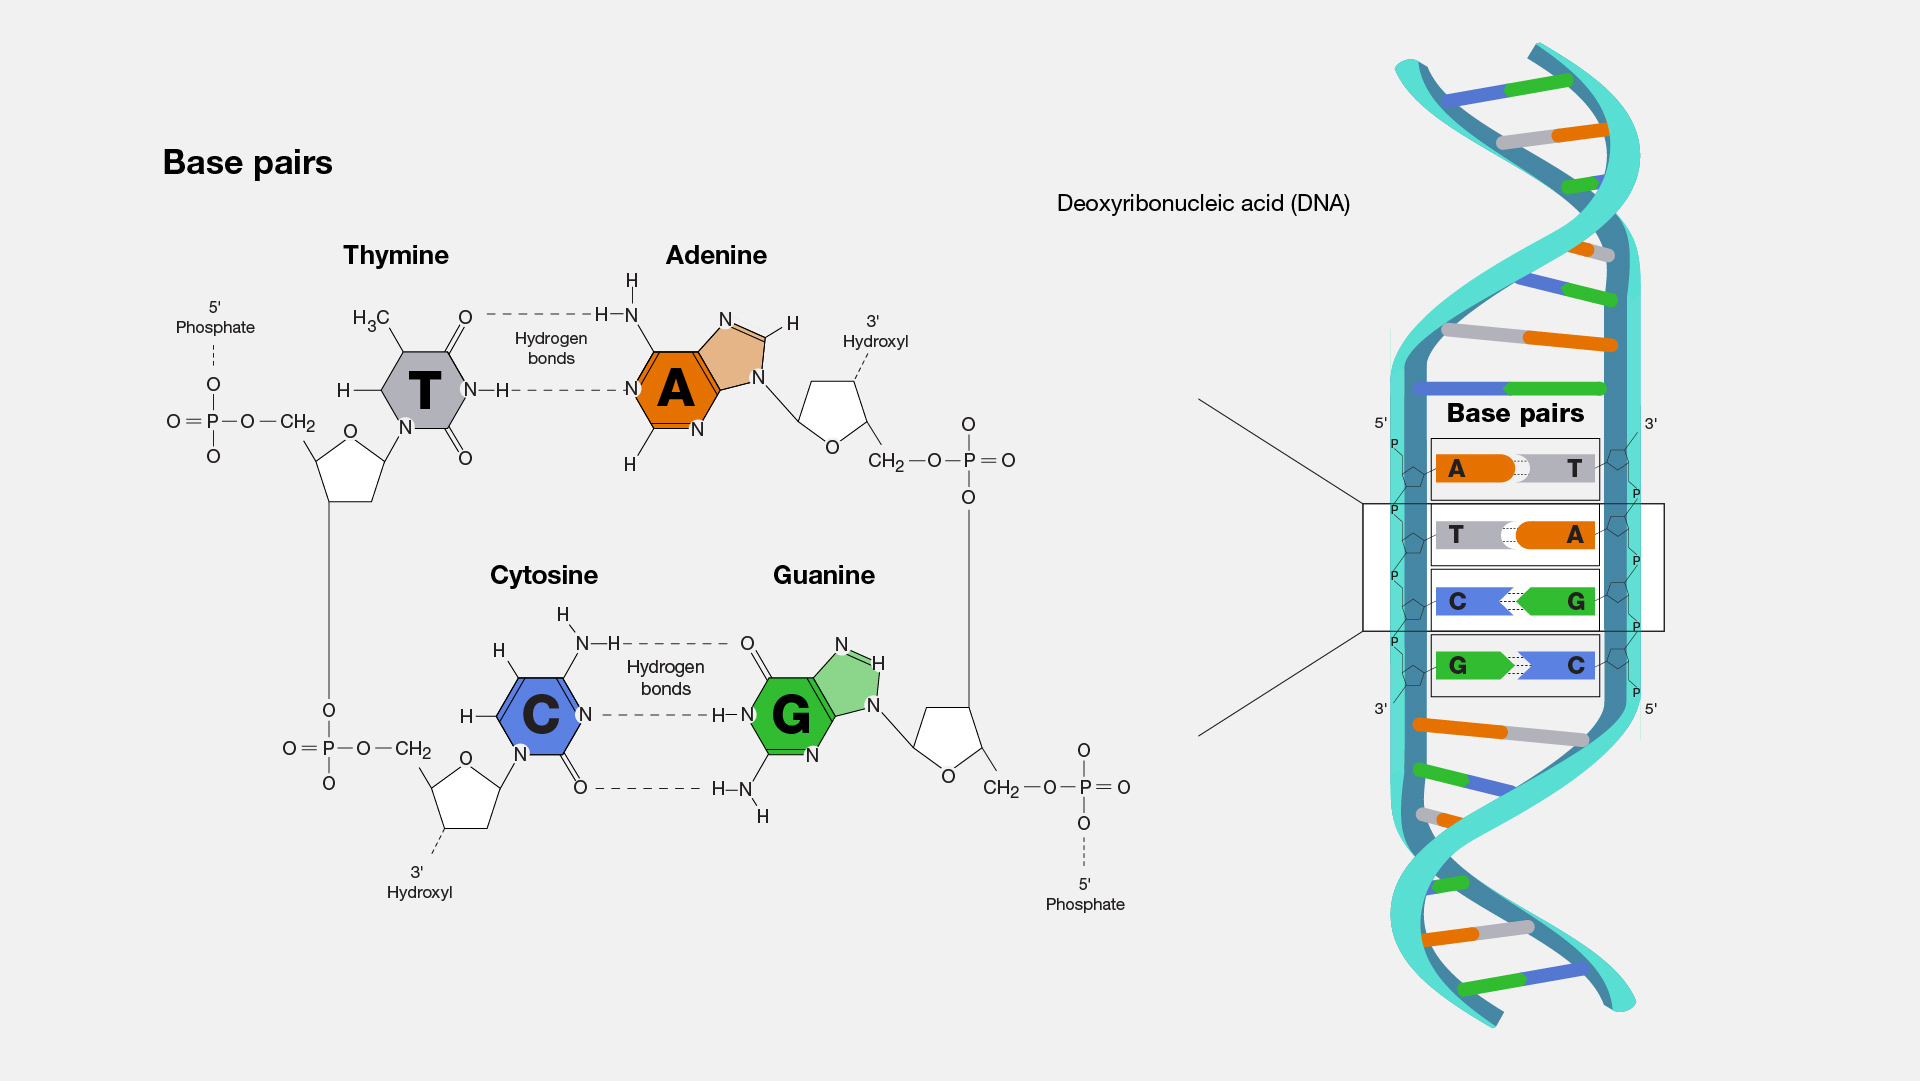

In [5]:
Image ('Base-pair.jpeg')

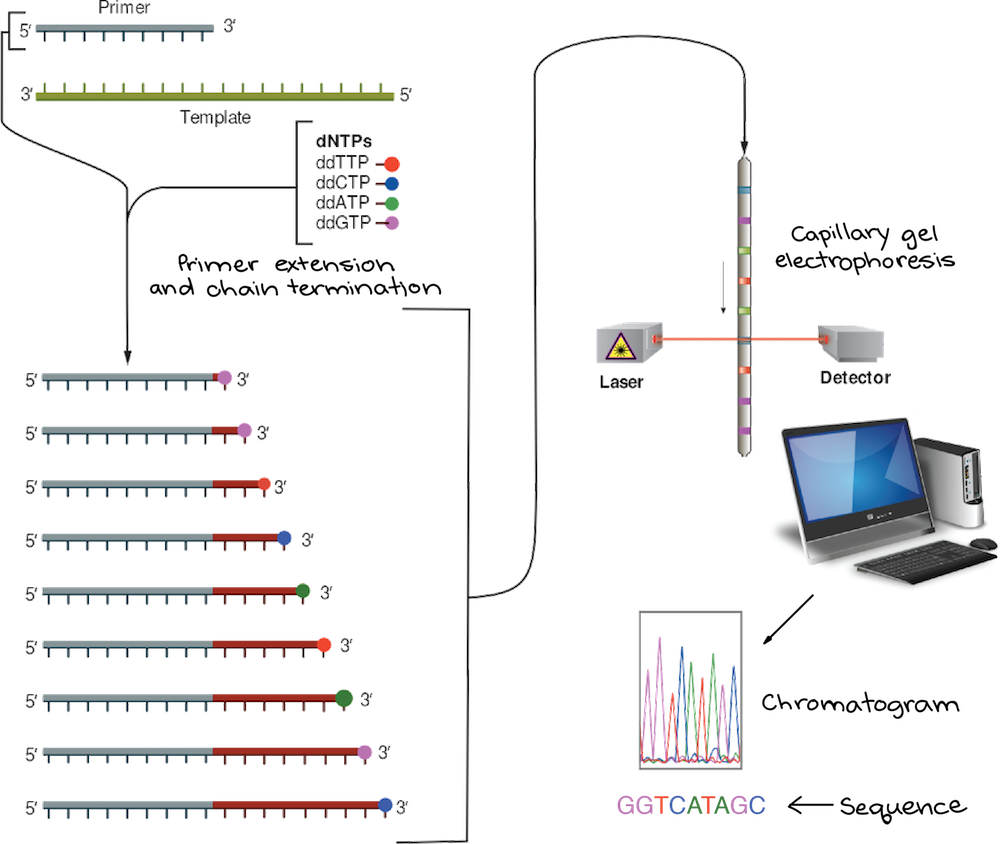

In [6]:
Image ('SangerSequencing.png')

In [7]:
humanDF= pd.read_table ('human.txt.zip')
chimpDF= pd.read_table ('chimpanzee.txt.zip')
dogDF= pd.read_table ('dog.txt.zip')

print ("Human DataFrame: shape",humanDF.shape)
humanDF.sample(5)

Human DataFrame: shape (4380, 2)


sequence  class
3461  ATGGAGCCGAGGGCAGGTGTCTCCAAACAGGACATACGTGAACAAA...      3
3040  ATGGGGAACATCACTGCAGACAACTCCTCGATGAGCTGTACCATCG...      0
4345  ATGCTGCAAGGGCCCCGGGCCTTGGCTTCGGCCGCTGGGCAGACCC...      6
1136  ATGCAAGCCCATGAGCTGTTCCGGTATTTTCGAATGCCAGAGCTGG...      3
389   ATGGGCCCCGGCGAGGCGCTGCTGGCGGGTCTCCTGGTGATGGTAC...      0

# Assumption:  The data generated from the Sanger Sequencing process has a high degree of accuracy.

In [8]:
print ("Chimpanzee DataFrame: shape",chimpDF.shape)
chimpDF.sample(5)

Chimpanzee DataFrame: shape (1682, 2)


sequence  class
733   ATGAAGGCGGCCGTCGATCTCAAGCCGACTCTCACCATCATCAAGA...      6
471   ATGCTCTCCCTGGATCCATCGGGTCCCGAGTGGGATTGCCCACTGG...      4
1429  ATGGATACGACGGCGGCGGCGGCGCTGCCTGCTTTTGTGGCGCTCT...      2
429   ATGGGCTGCTGGGGACAGCTGCTGGTGTGGTTCGGAGCCGCGGGGG...      1
1381  ATGCGCGCTGTCCTGGCTCGGGAGATGGACTGCCGCCGTGTTTTGG...      4

In [9]:
print ("Dog DataFrame: shape",dogDF.shape)
dogDF.sample(5)

Dog DataFrame: shape (820, 2)


sequence  class
100  TCTTCCTTTATAGGTAGGCGAAAACCAAGGGTACATCGGCCTCGTT...      6
663  ATGAGCCTTCGGAAGCTGCTGTTGCGCTTGCCCGGTTATCTTGGGG...      4
368  ATGTTGTCAGACTGCTTGCAAAATTTCTTAAAAATCACAAGCCCTC...      4
130  ATGCCTAATATTCAGTATCAAGTAATCCCACAGTTCCAGACCGTTG...      6
498  ATGGGGCACAACGGCAGCTGGGTCTCCCGGATCGCCAGCGAGCCGC...      0

# Function to break the input sequence into sets of overlapping substrings offset by a single character.  The input segmentSize is variable with a default of 6.


In [10]:
def genKmers(sequence, segmentSize=6):
    return [sequence[x: x + segmentSize].lower() for x in range(len(sequence) - segmentSize + 1)]

In [11]:
print (humanDF['sequence'][0],"\n\n",humanDF['sequence'][1])

ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG 

 ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAGGCCTACCCGCCGCAGTACTGATCATTCTATTTCCCCCTCTATTGATCCCCACCTCCAAATATCTCATCAACAACCGACTAATCACCACCCAACAATGACTAATCAAACTAACCTCAAAACAAATGATAACCATACACAACACTAAAGGACGAACCTGATCTCTTATACTAGTATCCTTAATCATTTTTATTGCCACAACTAACCTCCTCGGACTCCTGCCTCACTCATTTACACCAACCACCCAACTATCTATAAACCTAGCCATGGCCATCCCCTTATGAGCGGGCACAGTGATTATAGGCTTTCGCTCTAAGATTAAAAATGCCCTAGCCCACTTCTTACCACAAGGCACACCTACACCCCTTATCCCCATACTAGTTATTATCGAAACCATCAGCCTACTCATTCAACCAATAGCCCTGGCCGTACGCCTAACCGCTAACATTACTGCAGGCCACCTACTCATGCACCTAATTGGAAGCGCCACCCTAGCAATATCAACCATTAACCTTCCCTCTACACTTATCATCTTCACAATTCTAATTCTACTGACTATCCTAGAAATCGCTGTCGCCTTAATCCAAGCCTACGTTTTCACACTTCTAGTAAGCCTCTACCTGCACGACAACACATAA


In [12]:
humanDF['sequence'][0]

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

In [13]:
humanDF['sequence'][0]
genKmers(humanDF['sequence'][0])

['atgccc',
 'tgcccc',
 'gcccca',
 'ccccaa',
 'cccaac',
 'ccaact',
 'caacta',
 'aactaa',
 'actaaa',
 'ctaaat',
 'taaata',
 'aaatac',
 'aatact',
 'atacta',
 'tactac',
 'actacc',
 'ctaccg',
 'taccgt',
 'accgta',
 'ccgtat',
 'cgtatg',
 'gtatgg',
 'tatggc',
 'atggcc',
 'tggccc',
 'ggccca',
 'gcccac',
 'cccacc',
 'ccacca',
 'caccat',
 'accata',
 'ccataa',
 'cataat',
 'ataatt',
 'taatta',
 'aattac',
 'attacc',
 'ttaccc',
 'tacccc',
 'accccc',
 'ccccca',
 'ccccat',
 'cccata',
 'ccatac',
 'catact',
 'atactc',
 'tactcc',
 'actcct',
 'ctcctt',
 'tcctta',
 'ccttac',
 'cttaca',
 'ttacac',
 'tacact',
 'acacta',
 'cactat',
 'actatt',
 'ctattc',
 'tattcc',
 'attcct',
 'ttcctc',
 'tcctca',
 'cctcat',
 'ctcatc',
 'tcatca',
 'catcac',
 'atcacc',
 'tcaccc',
 'caccca',
 'acccaa',
 'cccaac',
 'ccaact',
 'caacta',
 'aactaa',
 'actaaa',
 'ctaaaa',
 'taaaaa',
 'aaaaat',
 'aaaata',
 'aaatat',
 'aatatt',
 'atatta',
 'tattaa',
 'attaaa',
 'ttaaac',
 'taaaca',
 'aaacac',
 'aacaca',
 'acacaa',
 'cacaaa',
 'acaaac',

In [14]:
humanDF["segments"]=humanDF.apply(lambda x: genKmers(x["sequence"]),axis=1)
humanDF.head()
chimpDF['segments'] = chimpDF.apply(lambda x: genKmers(x['sequence']), axis=1)
chimpDF = chimpDF.drop('sequence', axis=1)
dogDF['segments'] = dogDF.apply(lambda x: genKmers(x['sequence']), axis=1)
dogDF = dogDF.drop('sequence', axis=1)
humanDF=humanDF.drop("sequence",axis=1)
humanDF.head()

class                                           segments
0      4  [atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac...
1      4  [atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa...
2      3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
3      3  [atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca...
4      3  [atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc...

In [15]:
humanDF["segments"][2]

['atgtgt',
 'tgtgtg',
 'gtgtgg',
 'tgtggc',
 'gtggca',
 'tggcat',
 'ggcatt',
 'gcattt',
 'catttg',
 'atttgg',
 'tttggg',
 'ttgggc',
 'tgggcg',
 'gggcgc',
 'ggcgct',
 'gcgctg',
 'cgctgt',
 'gctgtt',
 'ctgttt',
 'tgtttg',
 'gtttgg',
 'tttggc',
 'ttggca',
 'tggcag',
 'ggcagt',
 'gcagtg',
 'cagtga',
 'agtgat',
 'gtgatg',
 'tgatga',
 'gatgat',
 'atgatt',
 'tgattg',
 'gattgc',
 'attgcc',
 'ttgcct',
 'tgcctt',
 'gccttt',
 'cctttc',
 'ctttct',
 'tttctg',
 'ttctgt',
 'tctgtt',
 'ctgttc',
 'tgttca',
 'gttcag',
 'ttcagt',
 'tcagtg',
 'cagtgt',
 'agtgtc',
 'gtgtct',
 'tgtctg',
 'gtctga',
 'tctgag',
 'ctgagt',
 'tgagtg',
 'gagtgc',
 'agtgct',
 'gtgcta',
 'tgctat',
 'gctatg',
 'ctatga',
 'tatgaa',
 'atgaag',
 'tgaaga',
 'gaagat',
 'aagatt',
 'agattg',
 'gattgc',
 'attgca',
 'ttgcac',
 'tgcaca',
 'gcacac',
 'cacaca',
 'acacag',
 'cacaga',
 'acagag',
 'cagagg',
 'agaggt',
 'gaggtc',
 'aggtcc',
 'ggtcca',
 'gtccag',
 'tccaga',
 'ccagat',
 'cagatg',
 'agatgc',
 'gatgca',
 'atgcat',
 'tgcatt',
 'gcattc',

In [16]:
human_segments=list(humanDF["segments"])
for item in range(len(human_segments)):
    human_segments[item] = ' '.join(human_segments[item])
human_tokens = humanDF.iloc[:, 0].values  

In [17]:
human_segments[2]

'atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accgg

In [18]:
human_tokens

array([4, 4, 3, ..., 6, 6, 6])

In [19]:
len(human_tokens)

4380

In [20]:
chimp_segments = list(chimpDF['segments'])
for item in range(len(chimp_segments)):
    chimp_segments[item] = ' '.join(chimp_segments[item])
chimp_tokens = chimpDF.iloc[:, 0].values                       

dog_segments = list(dogDF['segments'])
for item in range(len(dog_segments)):
    dog_segments[item] = ' '.join(dog_segments[item])
dog_tokens = dogDF.iloc[:, 0].values       

In [21]:
chimp_tokens

array([4, 4, 4, ..., 6, 3, 3])

# The Bag of Words (BoW) model is a method to describe the occurence of words within a document.  


In [22]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_segments)
X_chimp = cv.transform(chimp_segments)
X_dog = cv.transform(dog_segments)

In [23]:
print(X.shape)
print(X_chimp.shape)
print(X_dog.shape)

(4380, 232414)
(1682, 232414)
(820, 232414)


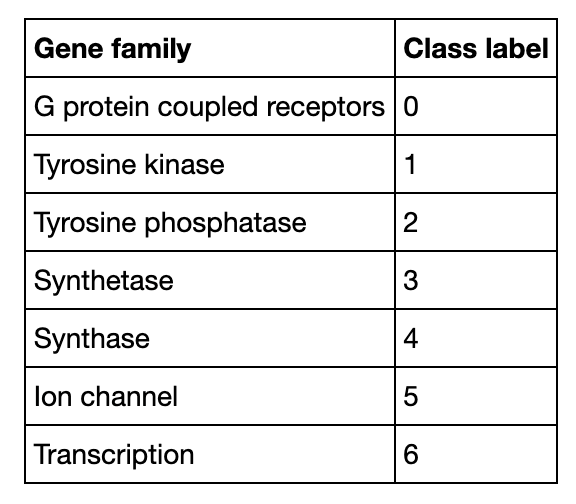

In [24]:
Image ('geneFamilyClassLabel.png')

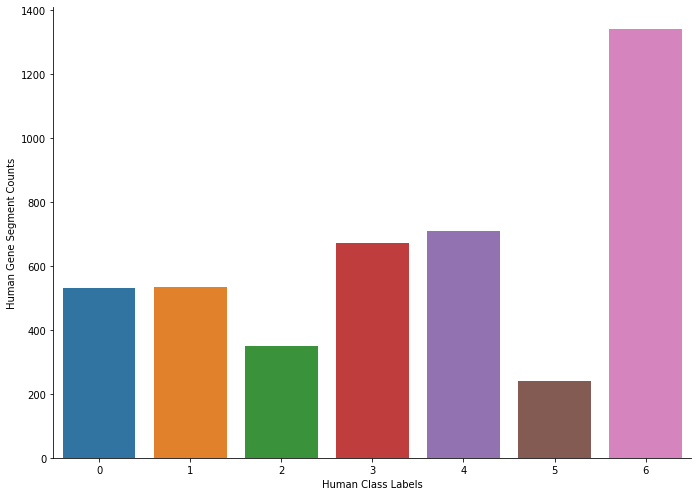

In [25]:
plotDF= pd.DataFrame()

plotDF= humanDF.groupby(['class']).size().reset_index()
plotDF.rename (columns={0 : 'segCounts'},inplace=True)

ax=sns.catplot(x='class', y="segCounts",kind='bar', data=plotDF,height=7,aspect=1.4);
ax.set_axis_labels("Human Class Labels", "Human Gene Segment Counts");

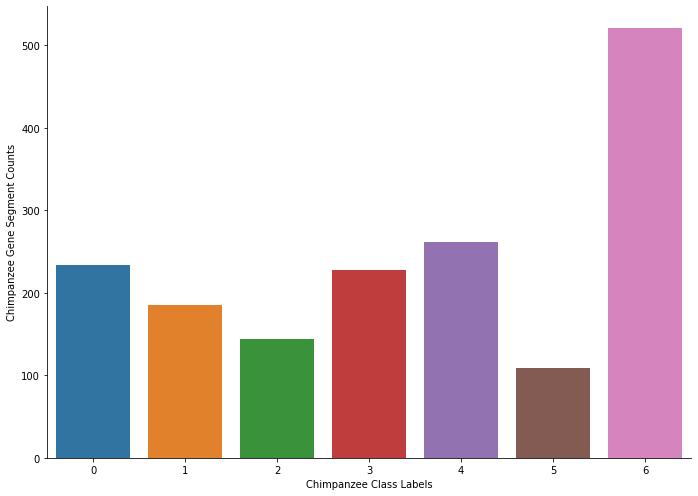

In [26]:
plotDF= chimpDF.groupby(['class']).size().reset_index()
plotDF.rename (columns={0 : 'segCounts'},inplace=True)

ax=sns.catplot(x='class', y="segCounts",kind='bar', data=plotDF,height=7,aspect=1.4);
ax.set_axis_labels("Chimpanzee Class Labels", "Chimpanzee Gene Segment Counts");

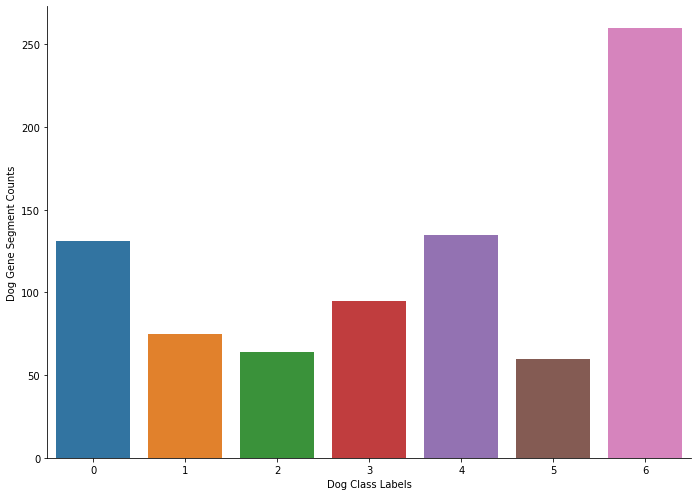

In [27]:
plotDF= dogDF.groupby(['class']).size().reset_index()
plotDF.rename (columns={0 : 'segCounts'},inplace=True)

ax=sns.catplot(x='class', y="segCounts",kind='bar', data=plotDF,height=7,aspect=1.4);
ax.set_axis_labels("Dog Class Labels", "Dog Gene Segment Counts");

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,human_tokens,test_size=0.2,random_state=42)

In [30]:
print(x_train.shape)
print(x_test.shape)

(3504, 232414)
(876, 232414)


# Naive Bayes Classifier

In [31]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(x_train, y_train)

MultinomialNB(alpha=0.1)

In [32]:
y_predictor = classifier.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print("Confusion matrix\n")
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_predictor, name='Predicted')))
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    F1_score = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, F1_score
accuracy, precision, recall, F1_score = get_metrics(y_test, y_predictor)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, F1_score))

Confusion matrix

Predicted   0    1   2    3    4   5    6
Actual                                   
0          99    0   0    0    1   0    2
1           0  104   0    0    0   0    2
2           0    0  78    0    0   0    0
3           0    0   0  124    0   0    1
4           1    0   0    0  143   0    5
5           0    0   0    0    0  51    0
6           1    0   0    1    0   0  263
accuracy = 0.984 
precision = 0.984 
recall = 0.984 
f1 = 0.984


In [35]:
# Predict the chimpanzee and dog sequences
y_predictor_chimp = classifier.predict(X_chimp)
y_predictor_dog = classifier.predict(X_dog)

# Performance metrics on chimpanzee gene prediction

In [36]:
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(chimp_tokens, name='Actual'), pd.Series(y_predictor_chimp, name='Predicted')))
accuracy, precision, recall, F1_score = get_metrics(chimp_tokens, y_predictor_chimp)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, F1_score))

Confusion matrix

Predicted    0    1    2    3    4    5    6
Actual                                      
0          232    0    0    0    0    0    2
1            0  184    0    0    0    0    1
2            0    0  144    0    0    0    0
3            0    0    0  227    0    0    1
4            2    0    0    0  254    0    5
5            0    0    0    0    0  109    0
6            0    0    0    0    0    0  521
accuracy = 0.993 
precision = 0.994 
recall = 0.993 
f1 = 0.993


# Performance metrics on dog gene prediction

In [37]:
# performance on dog genes
print("Confusion matrix\n")
print(pd.crosstab(pd.Series(dog_tokens, name='Actual'), pd.Series(y_predictor_dog, name='Predicted')))
accuracy, precision, recall, F1_score = get_metrics(dog_tokens, y_predictor_dog)
print("accuracy = %.3f \nprecision = %.3f \nrecall = %.3f \nf1 = %.3f" % (accuracy, precision, recall, F1_score))

Confusion matrix

Predicted    0   1   2   3    4   5    6
Actual                                  
0          127   0   0   0    0   0    4
1            0  63   0   0    1   0   11
2            0   0  49   0    1   0   14
3            1   0   0  81    2   0   11
4            4   0   0   1  126   0    4
5            4   0   0   0    1  53    2
6            0   0   0   0    0   0  260
accuracy = 0.926 
precision = 0.934 
recall = 0.926 
f1 = 0.925
